In [64]:
#CSCI 4502 - Data Mining
# Tanner O'Rourke
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats

In [65]:
conn = sqlite3.connect('spotify_song_data.db')
c = conn.cursor()
    
regression_query = """SELECT substr(rel_date,0,5) AS rel_year,
CASE WHEN (substr(rel_date,0,5) >= '1930' AND substr(rel_date,0,5) < '1940') THEN '1930'
    WHEN (substr(rel_date,0,5) >= '1940' AND substr(rel_date,0,5) < '1950') THEN '1940'
    WHEN (substr(rel_date,0,5) >= '1950' AND substr(rel_date,0,5) < '1960') THEN '1950'
    WHEN (substr(rel_date,0,5) >= '1960' AND substr(rel_date,0,5) < '1970') THEN '1960'
    WHEN (substr(rel_date,0,5) >= '1970' AND substr(rel_date,0,5) < '1980') THEN '1970'
    WHEN (substr(rel_date,0,5) >= '1980' AND substr(rel_date,0,5) < '1990') THEN '1980'
    WHEN (substr(rel_date,0,5) >= '1990' AND substr(rel_date,0,5) < '2000') THEN '1990'
    WHEN (substr(rel_date,0,5) >= '2000' AND substr(rel_date,0,5) < '2010') THEN '2000'
    WHEN (substr(rel_date,0,5) >= '2010' AND substr(rel_date,0,5) < '2020') THEN '2010'
    ELSE 'pre 1930' END
AS decade,

tempo, danceability, valence, 
energy, acousticness, instrumentalness

FROM song_analysis
WHERE tempo is not null AND tempo != 0.0
AND danceability is not null
AND valence is not null
AND energy is not null
AND acousticness is not null
AND instrumentalness is not null
AND substr(rel_date,0,5) >= '1899'
AND liveness is not null 
ORDER BY rel_date DESC"""

dfSpotify = pd.read_sql_query(regression_query, conn)
dfSpotify = dfSpotify.dropna()

conn.close()

dfSpotify.head()

db opened
db closed


uri: ['0wbnC9AUenxp613TYaJsGK', '0wbnC9AUenxp613TYaJsGK', '0wbnC9AUenxp613TYaJsGK']
name: ['Narcos', 'Narcos,Migos', 'Narcos,Migos']
release_date: ['2018-01', '2018-01', '2018-01']
explicit: [1, 1, 1]
time_signature: [4, 4, 4]
key: [7, 7, 7]
tempo: [124.987, 124.987, 124.987]
mode: [0, 0, 0]
duration: [255.379, 255.379, 255.379]
danceability: [0.936, 0.936, 0.936]
valence: [0.238, 0.238, 0.238]
energy: [0.588, 0.588, 0.588]
loudness: [-6.948, -6.948, -6.948]
speechiness: [0.136, 0.136, 0.136]
acousticness: [0.0146, 0.0146, 0.0146]
instrumentalness: [0, 0, 0]
liveness: [0.139, 0.139, 0.139]


(array([0., 0., 3., 0., 0.]),
 array([254.879, 255.079, 255.279, 255.479, 255.679, 255.879]),
 <a list of 5 Patch objects>)

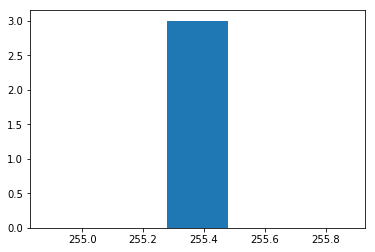

In [66]:
def avg_attr_over_years(attr_name):
    #takes the average for each year and returns a list of tuples (year, average of trait)
    #assert(type(dfSpotify[attr]) in [int, float, complex])
    
    years = list(set(dfSpotify.rel_year.values))

    attr_list = list()
    
    for yr in years:
        dfYr = dfSpotify.loc[dfSpotify.rel_year == yr]
        
        attr_list.append((yr, dfYr[attr_name].mean()))
    
    return attr_list

# print(type(dfSpotify['valence'][1]))
def plotTemporalTraits(traits):
    #takes a list of traits and plots them on a single graph. How to fix scaling issues?
    
    #create lists for all traits
    temp_traits = []
    for t in traits:
        temp_traits.append(avg_attr_over_years(t))
    
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    index = 0
    #plot each trait vs year
    for x in temp_traits:
        yrs = [t[0] for t in x]
        trait = [t[1] for t in x]
        ax.scatter(yrs, trait, alpha = 0.6, label = traits[index])
        index = index + 1;
    plt.legend()
    ax.set_xlabel("Year")
    ax.set_ylabel("Trait Value")
    
def plotTemporalTraitRegression(trait_name):
    
    trait_vs_year = avg_attr_over_years(trait_name)
    
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    index = 0
    
    yrs = [t[0] for t in trait_vs_year]
    trait = [t[1] for t in trait_vs_year]
    
    ax.scatter(yrs, trait, alpha = 0.6, label = trait_name)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(yrs, trait)
    print(r_value)
    
    x_vals = np.arange(yrs[0],yrs[-1])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label='SLR', color='coral')
    
    plt.legend()
    ax.set_xlabel("Year")
    ax.set_ylabel("Trait Value")

In [ ]:
# This graph shows issue with scale of different attributes on the same plot
plotTemporalTraits(['loudness', 'valence', 'acousticness'])


In [ ]:
plotTemporalTraitRegression('loudness')
plotTemporalTraitRegression('loudness')

In [ ]:
'''select
id,
name,
artist,
cast(substr(rel_date,0,5) as int) as rel_year,
case when (substr(rel_date,0,5) < '1910') then '1900s'
    when (substr(rel_date,0,5) >= '1910' and substr(rel_date,0,5) < '1920') then '1910s'
    when (substr(rel_date,0,5) >= '1920' and substr(rel_date,0,5) < '1930') then '1920s'
    when (substr(rel_date,0,5) >= '1930' and substr(rel_date,0,5) < '1940') then '1930s'
    when (substr(rel_date,0,5) >= '1940' and substr(rel_date,0,5) < '1950') then '1940s'
    when (substr(rel_date,0,5) >= '1950' and substr(rel_date,0,5) < '1960') then '1950s'
    when (substr(rel_date,0,5) >= '1960' and substr(rel_date,0,5) < '1970') then '1960s'
    when (substr(rel_date,0,5) >= '1970' and substr(rel_date,0,5) < '1980') then '1970s'
    when (substr(rel_date,0,5) >= '1980' and substr(rel_date,0,5) < '1990') then '1980s'
    when (substr(rel_date,0,5) >= '1990' and substr(rel_date,0,5) < '2000') then '1990s'
    when (substr(rel_date,0,5) >= '2000' and substr(rel_date,0,5) < '2010') then '2000s'
    when (substr(rel_date,0,5) >= '2010' and substr(rel_date,0,5) < '2020') then '2010s'
    end dateClass,
explicit,
case when (explicit = 0) then 'clean'
    when (explicit = 1) then 'explicit'
    end explicitClass,
time_signature,
key,
tempo,
case when (tempo <= 50) then 'very slow'
    when (tempo > 50 and tempo <= 100) then 'slow'
    when (tempo > 100 and tempo <= 150) then 'moderate'
    when (tempo > 150 and tempo <= 200) then 'fast'
    when (tempo > 200 and tempo <= 250) then 'very fast'
    end tempoClass,
mode,
case when (mode = 0) then 'minor'
    when (mode = 1) then 'major'
    end modeClass,
duration_ms,
case when (duration_ms <= 120000) then 'very short'
    when (duration_ms > 120000 and duration_ms <= 180000) then 'short'
    when (duration_ms > 180000 and duration_ms <= 240000) then 'medium'
    when (duration_ms > 240000 and duration_ms <= 300000) then 'long'
    when (duration_ms > 300000) then 'very long'
    end durationClass,
danceability,
case when (danceability <= 0.25) then 'low danceability'
    when (danceability > 0.25 and danceability <= 0.50) then 'low/moderate danceability'
    when (danceability > 0.50 and danceability <= 0.75) then 'moderate/high danceability'
    when (danceability > 0.75) then 'high danceability'
    end danceabilityClass,
valence,
case when (valence <= 0.25) then 'low valence'
    when (valence > 0.25 and valence <= 0.50) then 'low/moderate valence'
    when (valence > 0.50 and valence <= 0.75) then 'moderate/high valence'
    when (valence > 0.75) then 'high valence'
    end valenceClass,
energy,
case when (energy <= 0.25) then 'low energy'
    when (energy > 0.25 and energy <= 0.50) then 'low/moderate energy'
    when (energy > 0.50 and energy <= 0.75) then 'moderate/high energy'
    when (energy > 0.75) then 'high energy'
    end energyClass,
loudness,
case when (loudness < -45 ) then 'very quiet'
    when (loudness > -45 and loudness <= -30) then 'quiet'
    when (loudness > -30 and loudness <= -15) then 'moderate'
    when (loudness > -15 and loudness <= 0) then 'loud'
    when (loudness > 0 and loudness <= 15) then 'very loud'
    end loudnessClass,
speechiness,
case when (speechiness <= 0.33) then 'just music'
    when (speechiness > 0.33 and speechiness <= 0.66) then 'both music and speech'
    when (speechiness > 0.66) then 'just speech'
    end speechinessClass,
acousticness,
case when (acousticness <= 0.25) then 'low acousticness'
    when (acousticness > 0.25 and acousticness <= 0.50) then 'low/moderate acousticness'
    when (acousticness > 0.50 and acousticness <= 0.75) then 'moderate/high acousticness'
    when (acousticness > 0.75) then 'high acousticness'
    end acousticnessClass,
instrumentalness,
case when (instrumentalness <= 0.25) then 'less instrumental'
    when (instrumentalness > 0.25 and instrumentalness <= 0.75) then 'moderate instrumentalness'
    when (instrumentalness > 0.75) then 'more instrumental'
    end instrumentalnessClass,
liveness,
case when (liveness <= 0.33) then 'studio recording'
    when (liveness > 0.33 and liveness <= 0.66) then 'moderate liveness'
    when (liveness > 0.66) then 'live recording'
    end livenessClass
from song_analysis
where
key is not null
and tempo is not null
and mode is not null
and duration_ms is not null
and danceability is not null
and valence is not null
and energy is not null
and loudness is not null
and speechiness is not null
and instrumentalness is not null
and substr(rel_date,0,5) >= '1899'
and tempo != 0.0
and time_signature != 0
and liveness is not null
and duration_ms >= 60000;'''